In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from typing import Optional, List, Dict, Union

# graph styling
plt.style.use('seaborn-dark')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

## Measured velocity & filenames lookup table

In [21]:
speeds_df = pd.read_csv('Speed-Filenames.csv')
nans = speeds_df.isna().sum()

# check for missing data
for i in range(len(nans.index)):
    print(f'Column: {nans.index[i]}, Missing values: {nans[i]}')

Column: Speed, Missing values: 0
Column: Filename, Missing values: 0


In [126]:
def create_hist(data: Union[pd.Series, List], title: Optional[str] = None, xlabel: Optional[str] = None):
    '''
    plots histograms
    inputs:
        data: an array of to plot 
        title: optional string, graph title
        xlabel: optional string, x label title
    '''

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.hist(data)
    
    # add the labels
    ax.set_title(title)
    ax.set_ylabel('Frequency')
    ax.set_xlabel(xlabel)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return

def create_line(x: Union[pd.Series, List], y: Union[pd.Series, List], title: Optional[str] = None, 
                xlabel: Optional[str] = None, ylabel: Optional[str] = None):
    '''
    plots histograms
    inputs:
        data: an array of to plot 
        title: optional string, graph title
        xlabel: optional string, x label title
    '''

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y)
    
    # add the labels
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return

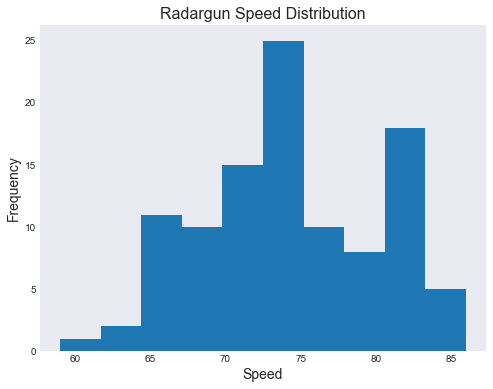

In [50]:
# distribution - radargun speeds
create_hist(speeds_df['Speed'], title='Radargun Speed Distribution', xlabel='Speed')

**Note**:
* I'm assuming the velocity was measured at the end of the alloted time frame

## IMU Data

In [103]:
# load raw imu data
path = 'raw_imu_data/'
filenames = glob.glob(f'{path}*.txt')

In [111]:
# use the first file as a playground
df = pd.read_csv(filenames[0])
df.head()

,Time_s_,Acc_x_m_s_2_,Acc_y_m_s_2_,Acc_z_m_s_2_,Gyro_x_1_s_,Gyro_y_1_s_,Gyro_z_1_s_
0,0.000,0.156587,0.335328,0.051554,-0.429806,-0.978888,-0.494023
1,0.002,0.062543,0.420723,-0.018344,-0.409490,-0.947561,-0.487375
2,0.004,-0.033180,0.507209,-0.092663,-0.385810,-0.910554,-0.480350
3,0.006,-0.130096,0.596874,-0.174642,-0.358316,-0.867007,-0.473190
4,0.008,-0.228663,0.690690,-0.266529,-0.326435,-0.815904,-0.466010


**Few things to note**:
* Author converted the accelorometer data to meters by time sequared (m/s^2)
* Author converted the gyroscope data to rad (1/s)
* 0.002 seconds intervals 

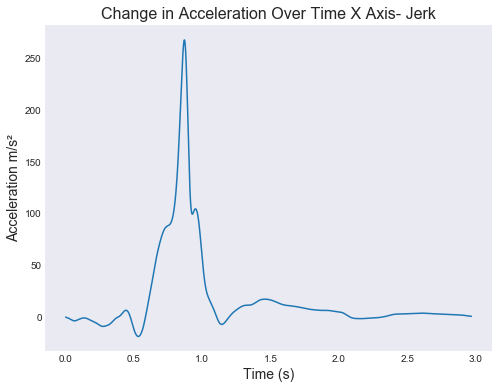

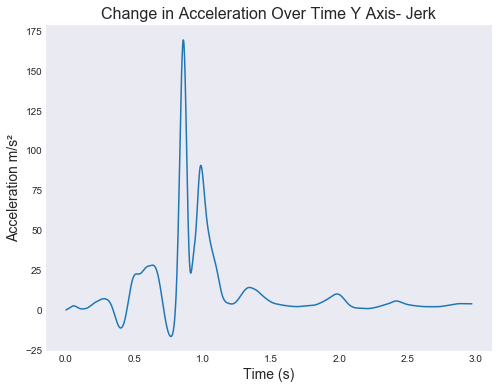

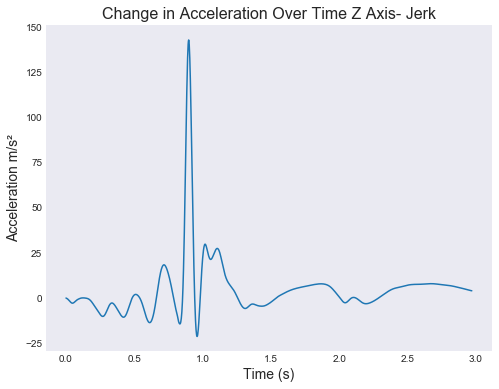

In [131]:
# lets look at change of acceleration over time in every axis
for axis in ['x', 'y', 'z']:
    xlabel = 'Time (s)'
    ylabel = 'Acceleration m/s\u00b2'
    title = f'Change in Acceleration Over Time {axis.upper()} Axis- Jerk'
    create_line(df['Time_s_'], df[f'Acc_{axis}_m_s_2_'], title=title, xlabel=xlabel, ylabel=ylabel)

**Note**:
* I hope the accelermoter is calibrated
* Lets assume the axis are used as 
* How was the acceleration created? was it throne?  